# Работа с данными в Pandas

In [1]:
import pandas as pd

In [2]:
dict_footbal = {'name':['messi','ronaldo','neymar','ibra','mbappe','ramos','alba','modric','xavi', 'de_bruyne', 'haaland'], 'speed':[7,8,9,6,10,6,7,7,7,7,9],'shoot':[10,9,7,7,8,7,6,8,7,8,8],'dribbling':[10,7,9,7,8,5,6,7,8,7,6],'pas':[10,6,8,7,7,7,8,9,9,10,6],'phy':[7,9,6,8,7,7,6,7,6,7,10],'def':[6,5,5,6,4,9,7,7,8,7,5]}

data_footbal = pd.DataFrame(dict_footbal)
data_footbal = data_footbal.set_index('name')
data_footbal

,speed,shoot,dribbling,pas,phy,def
name,,,,,,
messi,7,10,10,10,7,6
ronaldo,8,9,7,6,9,5
neymar,9,7,9,8,6,5
ibra,6,7,7,7,8,6
mbappe,10,8,8,7,7,4
ramos,6,7,5,7,7,9
alba,7,6,6,8,6,7
modric,7,8,7,9,7,7
xavi,7,7,8,9,6,8


## Редукция и вычисление описательных статистик

In [3]:
data = data_footbal   # синоним для более короткой записи (ссылка на датафрейм)

In [4]:
data.sum()  # сумма по столбцам

speed        83
shoot        85
dribbling    80
pas          87
phy          80
def          69
dtype: int64

In [5]:
data.sum(axis=1) # сумма по строкам

name
messi        50
ronaldo      44
neymar       44
ibra         41
mbappe       44
ramos        41
alba         40
modric       45
xavi         45
de_bruyne    46
haaland      44
dtype: int64

In [6]:
data.mean()  # cреднее по столбцам

speed        7.545455
shoot        7.727273
dribbling    7.272727
pas          7.909091
phy          7.272727
def          6.272727
dtype: float64

In [7]:
data.mean(axis=1) # среднее по строкам

name
messi        8.333333
ronaldo      7.333333
neymar       7.333333
ibra         6.833333
mbappe       7.333333
ramos        6.833333
alba         6.666667
modric       7.500000
xavi         7.500000
de_bruyne    7.666667
haaland      7.333333
dtype: float64

##### редукция - метод, вычисляющий единственное значение (сводные статистики)
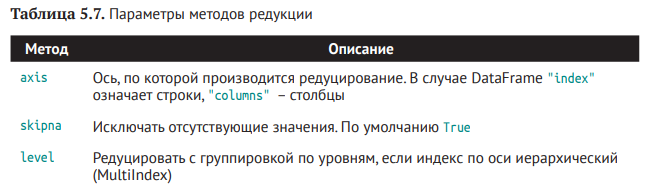

In [8]:
data.idxmax()  # (.idmin) индекс, при котором достигается максимум

speed         mbappe
shoot          messi
dribbling      messi
pas            messi
phy          haaland
def            ramos
dtype: object

In [9]:
data.idxmin()

speed           ibra
shoot           alba
dribbling      ramos
pas          ronaldo
phy           neymar
def           mbappe
dtype: object

- аккумулирующие методы

In [10]:
data.cumsum(axis=0)  # типа reduce() 

,speed,shoot,dribbling,pas,phy,def
name,,,,,,
messi,7,10,10,10,7,6
ronaldo,15,19,17,16,16,11
neymar,24,26,26,24,22,16
ibra,30,33,33,31,30,22
mbappe,40,41,41,38,37,26
ramos,46,48,46,45,44,35
alba,53,54,52,53,50,42
modric,60,62,59,62,57,49
xavi,67,69,67,71,63,57


In [11]:
data.describe()  # cразу несколько сводных статистик (краткий обзор)

,speed,shoot,dribbling,pas,phy,def
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,7.545455,7.727273,7.272727,7.909091,7.272727,6.272727
std,1.293340,1.103713,1.420627,1.445998,1.272078,1.489356
min,6.000000,6.000000,5.000000,6.000000,6.000000,4.000000
25%,7.000000,7.000000,6.500000,7.000000,6.500000,5.000000
50%,7.000000,8.000000,7.000000,8.000000,7.000000,6.000000
75%,8.500000,8.000000,8.000000,9.000000,7.500000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000


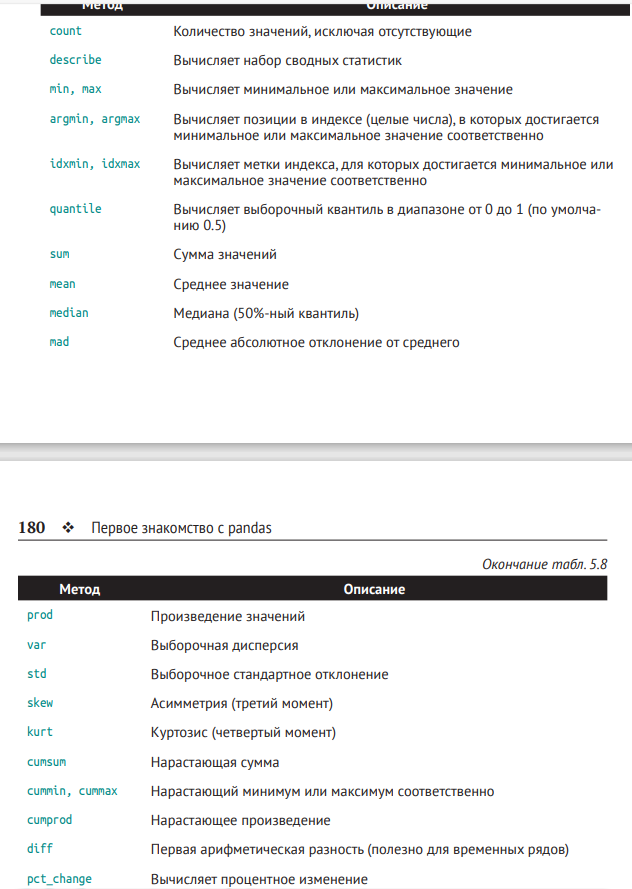

In [12]:
data.diff()

,speed,shoot,dribbling,pas,phy,def
name,,,,,,
messi,NaN,NaN,NaN,NaN,NaN,NaN
ronaldo,1.0,-1.0,-3.0,-4.0,2.0,-1.0
neymar,1.0,-2.0,2.0,2.0,-3.0,0.0
ibra,-3.0,0.0,-2.0,-1.0,2.0,1.0
mbappe,4.0,1.0,1.0,0.0,-1.0,-2.0
ramos,-4.0,-1.0,-3.0,0.0,0.0,5.0
alba,1.0,-1.0,1.0,1.0,-1.0,-2.0
modric,0.0,2.0,1.0,1.0,1.0,0.0
xavi,0.0,-1.0,1.0,0.0,-1.0,1.0


In [13]:
data.pct_change()

,speed,shoot,dribbling,pas,phy,def
name,,,,,,
messi,NaN,NaN,NaN,NaN,NaN,NaN
ronaldo,0.142857,-0.100000,-0.300000,-0.400000,0.285714,-0.166667
neymar,0.125000,-0.222222,0.285714,0.333333,-0.333333,0.000000
ibra,-0.333333,0.000000,-0.222222,-0.125000,0.333333,0.200000
mbappe,0.666667,0.142857,0.142857,0.000000,-0.125000,-0.333333
ramos,-0.400000,-0.125000,-0.375000,0.000000,0.000000,1.250000
alba,0.166667,-0.142857,0.200000,0.142857,-0.142857,-0.222222
modric,0.000000,0.333333,0.166667,0.125000,0.166667,0.000000
xavi,0.000000,-0.125000,0.142857,0.000000,-0.142857,0.142857


## Корреляция и ковариация

Корелляция показывает силу линейной связи (нелинейные взаимосвязи не уловит)

In [14]:
data.corr()  # корреляционная матрциа (нормированная ковариация) - пирсона

,speed,shoot,dribbling,pas,phy,def
speed,1.000000,0.184687,0.291922,-0.345132,0.204448,-0.811754
shoot,0.184687,1.000000,0.498620,0.170885,0.414398,-0.376064
dribbling,0.291922,0.498620,1.000000,0.500078,-0.321954,-0.416774
pas,-0.345132,0.170885,0.500078,1.000000,-0.637552,0.384134
phy,0.204448,0.414398,-0.321954,-0.637552,1.000000,-0.412661
def,-0.811754,-0.376064,-0.416774,0.384134,-0.412661,1.000000


In [17]:
data['shoot'].corr(data['phy'])  # ковариация между отдельными столбцами

0.4143979264615632

In [18]:
data.cov()  # ковариационная матрица

,speed,shoot,dribbling,pas,phy,def
speed,1.672727,0.263636,0.536364,-0.645455,0.336364,-1.563636
shoot,0.263636,1.218182,0.781818,0.272727,0.581818,-0.618182
dribbling,0.536364,0.781818,2.018182,1.027273,-0.581818,-0.881818
pas,-0.645455,0.272727,1.027273,2.090909,-1.172727,0.827273
phy,0.336364,0.581818,-0.581818,-1.172727,1.618182,-0.781818
def,-1.563636,-0.618182,-0.881818,0.827273,-0.781818,2.218182


In [19]:
data.corrwith(data['pas'])  # попарные корелляции 

speed       -0.345132
shoot        0.170885
dribbling    0.500078
pas          1.000000
phy         -0.637552
def          0.384134
dtype: float64

<Axes: >

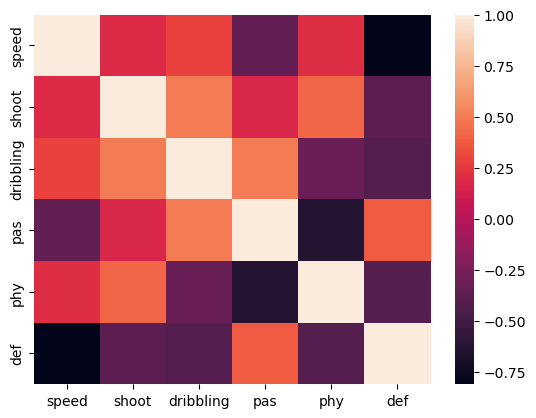

In [16]:
import seaborn as sns
sns.heatmap(data.corr())

#### но лучше использовать для разведовательного анализа phik

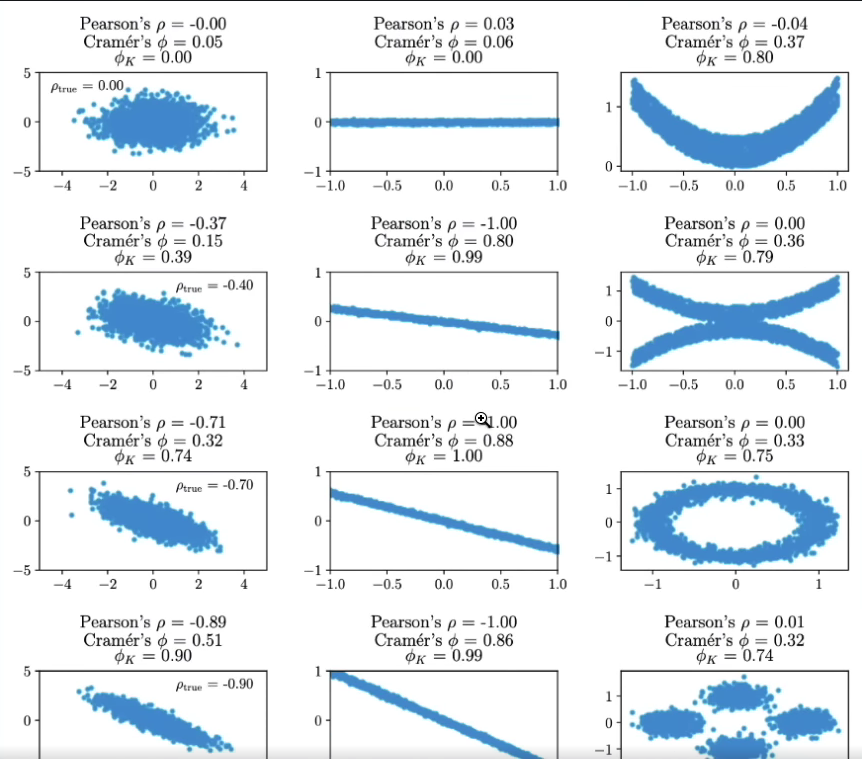

In [21]:
import phik
from phik.report import plot_correlation_matrix

In [24]:
phik_matrix = data.phik_matrix()  # кстати тут есть связь с категориальными переменными
phik_matrix

interval columns not set, guessing: ['speed', 'shoot', 'dribbling', 'pas', 'phy', 'def']


,speed,shoot,dribbling,pas,phy,def
speed,1.000000,0.625641,0.000000,0.795503,0.860046,0.744995
shoot,0.625641,1.000000,0.334284,0.457177,0.780602,0.000000
dribbling,0.000000,0.334284,1.000000,0.000000,0.000000,0.791170
pas,0.795503,0.457177,0.000000,1.000000,0.809038,0.305684
phy,0.860046,0.780602,0.000000,0.809038,1.000000,0.000000
def,0.744995,0.000000,0.791170,0.305684,0.000000,1.000000


In [27]:
phik_matrix['pas'].sort_values(ascending=False)

pas          1.000000
phy          0.809038
speed        0.795503
shoot        0.457177
def          0.305684
dribbling    0.000000
Name: pas, dtype: float64

<Axes: >

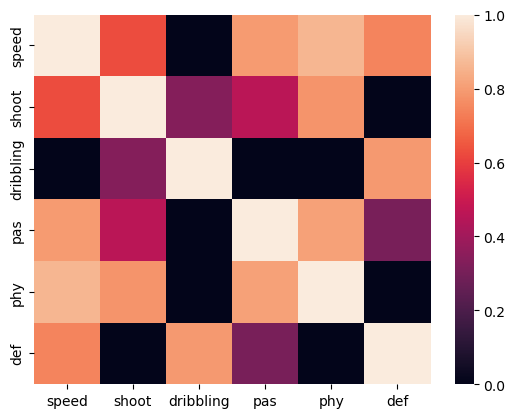

In [25]:
sns.heatmap(phik_matrix)

## Уникальные значения, счетчики значений и членство

In [28]:
data

,speed,shoot,dribbling,pas,phy,def
name,,,,,,
messi,7,10,10,10,7,6
ronaldo,8,9,7,6,9,5
neymar,9,7,9,8,6,5
ibra,6,7,7,7,8,6
mbappe,10,8,8,7,7,4
ramos,6,7,5,7,7,9
alba,7,6,6,8,6,7
modric,7,8,7,9,7,7
xavi,7,7,8,9,6,8


In [29]:
data['pas'].unique()   # массив уникальных значений

array([10,  6,  8,  7,  9], dtype=int64)

In [30]:
data['phy'].value_counts()  # частоты встречаемости значений

7     5
6     3
9     1
8     1
10    1
Name: phy, dtype: int64

- Метод isin вычисляет булев вектор членства в множестве

In [31]:
mask = data.isin([10,9])  # проверка на вхождение (членство)
mask

,speed,shoot,dribbling,pas,phy,def
name,,,,,,
messi,False,True,True,True,False,False
ronaldo,False,True,False,False,True,False
neymar,True,False,True,False,False,False
ibra,False,False,False,False,False,False
mbappe,True,False,False,False,False,False
ramos,False,False,False,False,False,True
alba,False,False,False,False,False,False
modric,False,False,False,True,False,False
xavi,False,False,False,True,False,False


In [32]:
data[mask] 

,speed,shoot,dribbling,pas,phy,def
name,,,,,,
messi,NaN,10.0,10.0,10.0,NaN,NaN
ronaldo,NaN,9.0,NaN,NaN,9.0,NaN
neymar,9.0,NaN,9.0,NaN,NaN,NaN
ibra,NaN,NaN,NaN,NaN,NaN,NaN
mbappe,10.0,NaN,NaN,NaN,NaN,NaN
ramos,NaN,NaN,NaN,NaN,NaN,9.0
alba,NaN,NaN,NaN,NaN,NaN,NaN
modric,NaN,NaN,NaN,9.0,NaN,NaN
xavi,NaN,NaN,NaN,9.0,NaN,NaN


In [33]:
# возвращает массив индексов, описывающий соответствие между
#   массивом потенциально повторяющихся значений 
#      и массивом, содержащим только различные значения


pd.Index([10,9,8]).get_indexer(data['dribbling'])  # в данном случе повторяются 0 раз (10)б 1 раз (9) и 2 раза (8)



array([ 0, -1,  1, -1,  2, -1, -1, -1,  2, -1, -1], dtype=int64)

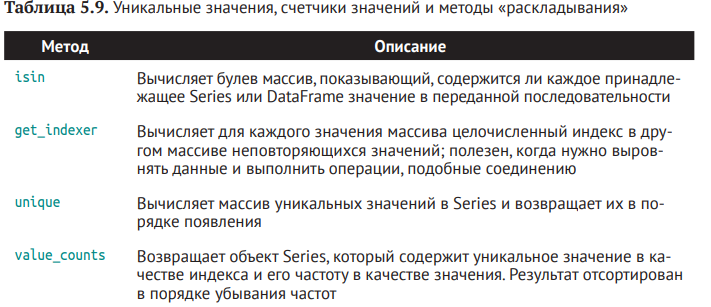

In [35]:
# вычислениe счетчиков по всем столбцам
data.apply(pd.value_counts).fillna('-')

,speed,shoot,dribbling,pas,phy,def
4,-,-,-,-,-,1.0
5,-,-,1.0,-,-,3.0
6,2.0,1.0,2.0,2.0,3.0,2.0
7,5.0,4.0,4.0,3.0,5.0,3.0
8,1.0,4.0,2.0,2.0,1.0,1.0
9,2.0,1.0,1.0,2.0,1.0,1.0
10,1.0,1.0,1.0,2.0,1.0,-


In [36]:
data.value_counts()  # строки?

speed  shoot  dribbling  pas  phy  def
6      7      5          7    7    9      1
              7          7    8    6      1
7      6      6          8    6    7      1
       7      8          9    6    8      1
       8      7          9    7    7      1
                         10   7    7      1
       10     10         10   7    6      1
8      9      7          6    9    5      1
9      7      9          8    6    5      1
       8      6          6    10   5      1
10     8      8          7    7    4      1
dtype: int64

In [37]:
data_new = data.copy()  # копирование датафрейма, чтобы получить новый объект

In [ ]:
data_new is data

In [ ]:
data_new

In [ ]:
data_new.where(data>=9,'-')

In [ ]:
mask = (data>=7)&(data<=8)
mask

In [ ]:
data_new.where(~(mask),'+')

In [ ]:
data_new.value_counts() # Возвращает ряд, содержащий частоту каждой отдельной строки в кадре данных